Introduction: 

The protection of endangered species is a crucial aspect of preserving global biodiversity and maintaining the health of ecosystems. Over time, the number of species listed as endangered has fluctuated significantly which is the result of changes in environmental policies, conservation efforts, and the impact of human activities. By understanding the trends in endangered species listings over the years, it not only sheds light on the effectiveness of these efforts but can also highlight the challenges that remain. 
To address this problem, our group has analyzed historical data on endangered species listings by specifically examining trends from 1967 to the present. Using the dataset of "species listings by year," we used techniques such as data visualization and trend analysis to identify patterns over time. We also plan on using and exploring some external factors which include environmental events, legislative actions, and human activities that may have contributed to shifts in the number of species listed as endangered.
By analyzing these trends, our approach will help us to find these periods of heightened endangerment and provide potential explanations for these periods.
We hope that the findings of our analysis will be helpful for our policymakers and environmental advocates. By identifying the critical trends, we can make more informed decisions on how to design an effective conservation program to mitigate the factors threatening endangered species. 


We use Pandas as it is essential for us to load and clean our datasets.
We use Matplotlib as it is essential for us to create our plots and graphs to visually represent our data. 
We might use numpy as we need it to do some complex calculations to put in our dataset. 


https://ecos.fws.gov/ecp/report/species-listings-by-year-totals:
This is the link to the original dataset we are using. The dataset was created by the US Fish and Wildlife service and we believe it was created in 1967 as that was when the first listings appeared. This dataset shows only two things, the year and the number of endangered species that were added during this year. However, in the year category, they have put hyperlinks in all the years and that link takes us to another dataset that show us the species that was added in and whether it is a mammal,fish or bird and if it is still endangered or not(ESA listing Status). Inside that dataset, we have another hyperlink and this is in every animal's scientific name and if we click on it, it takes to another dataset giving us all the information that the government has on this animal. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

In [2]:
endangered_animals = pd.read_csv("species-listings-by-year-totals-report.csv")
endangered_animals = endangered_animals.sort_values(by="Calendar Year", ascending=True)
endangered_animals.head(5)

,Calendar Year,Number of Species Listings
53,1967,70
54,1968,0
55,1969,0
52,1970,44
56,1971,0


In [5]:
filtered_data = endangered_animals[(endangered_animals["Calendar Year"] >= 2013) & (endangered_animals["Calendar Year"] <= 2023)]
filtered_data = filtered_data.sort_values(by="Calendar Year", ascending=True)
filtered_data.head(10)

#plt.figure(figsize=(10, 6))
#plt.plot(filtered_data["Calendar Year"], filtered_data["Number of Species Listings"], marker='o')

#plt.title("Endangered Species Listings (2013-2023)")
#plt.xlabel("Year")
#plt.ylabel("Number of Species Listings")

,Calendar Year,Number of Species Listings
12,2013,83
11,2014,36
10,2015,27
9,2016,73
8,2017,9
7,2018,5
6,2019,4
5,2020,4
4,2021,10
3,2022,7


In 1967, we see that we started with a high count of 70 species. The years after that saw fluctuating counts, with some even having little to no listings (1968, 1969, 1971, and 1974).Starting in the 1970s, consistent listings appear, suggesting growing attention to endangered species due to increased awareness and policy interventions. 
In the early 1990s a lot of endangered animal listings were happening with the peak of it being in 1994 with 128 listings. This could correlate with heightened conservation efforts and better methodologies for identifying endangered species during that period.
In the 2000s to now we can see  significant peaks in years like 2013 (83 listings) and 2016 (73 listings). However, the trend appears to go down even more in recent years (2020-2025), and this can  indicate that we have improved conservation success or changes in listing criteria.


In [3]:
#https://docs.google.com/spreadsheets/d/1qKUzrbwgH9g5jeiCTQ19jV1swAtp_VrYdP31G681kwk/edit?usp=sharing
#sheet_id = "1qKUzrbwgH9g5jeiCTQ19jV1swAtp_VrYdP31G681kwk"

#xls = pd.ExcelFile(f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=xlsx")

new_data = pd.read_csv('Data_271_Project_SpreadSheet - Sheet1.csv')
new_data.head()

,Scientific Name,Locations,ESA Listing Status,Year,Type of Animal
0,Rana boylii,Pacific Southwest Region,Threatened,2023,Amphibians
1,Rana boylii,Pacific Southwest Region,Threatened,2023,Amphibians
2,Rana boylii,Pacific Southwest Region,Endangered,2023,Amphibians
3,Rana boylii,Pacific Southwest Region,Endangered,2023,Amphibians
4,Tympanuchus pallidicinctus,Southwest Region,Threatened,2023,Birds


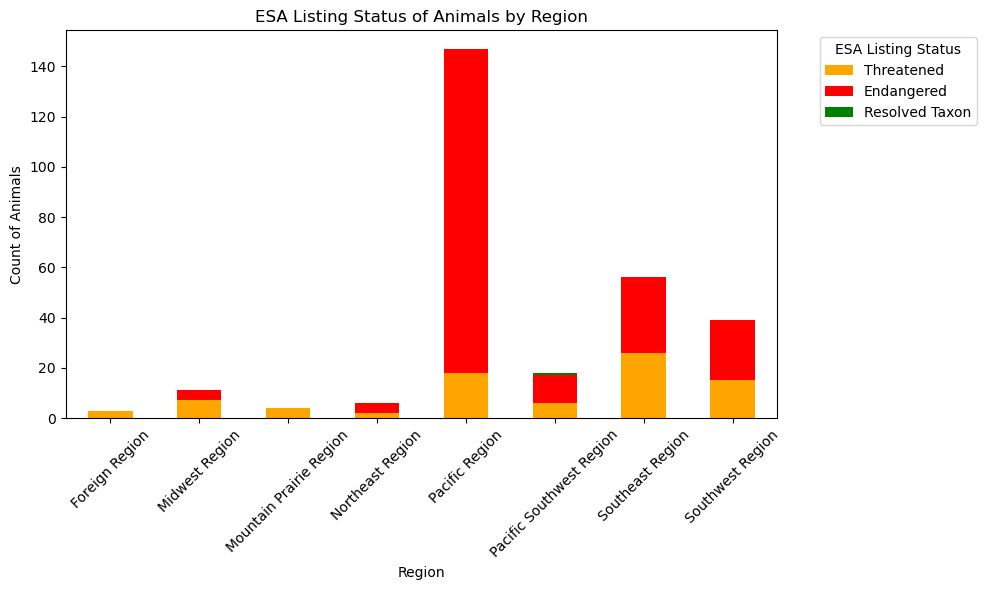

In [4]:
colors = {'Endangered': 'red', 'Threatened': 'orange', 'Resolved Taxon': 'green'}

status_counts = new_data.groupby(['Locations', 'ESA Listing Status']).size().unstack().fillna(0)

status_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=[colors[col] for col in status_counts.columns])
plt.xlabel("Region")
plt.ylabel("Count of Animals")
plt.title("ESA Listing Status of Animals by Region")
plt.legend(title="ESA Listing Status", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

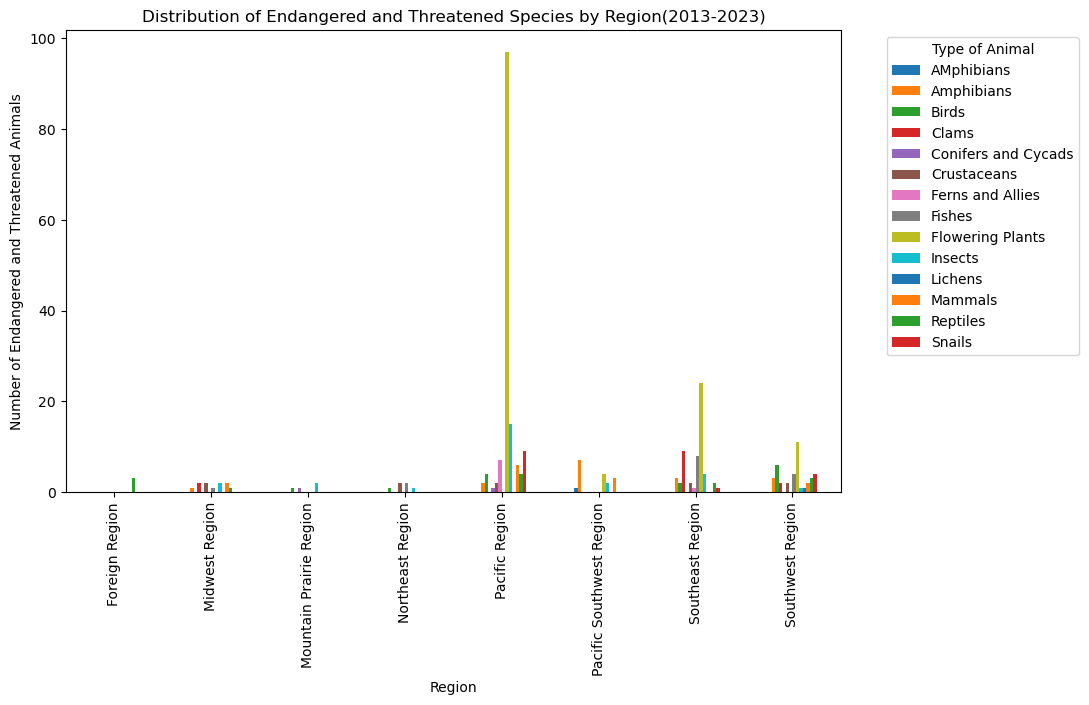

In [20]:
filtered_data = new_data[new_data['ESA Listing Status'].isin(['Endangered', 'Threatened'])]

yearly_animal_counts = filtered_data.groupby(['Locations', 'Type of Animal']).size().unstack().fillna(0)

fig, ax = plt.subplots(figsize=(10, 6))

yearly_animal_counts.plot(kind='bar', ax=ax)

plt.xlabel("Region")
plt.ylabel("Number of Endangered and Threatened Animals")
plt.title("Distribution of Endangered and Threatened Species by Region(2013-2023)")
plt.legend(title="Type of Animal", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

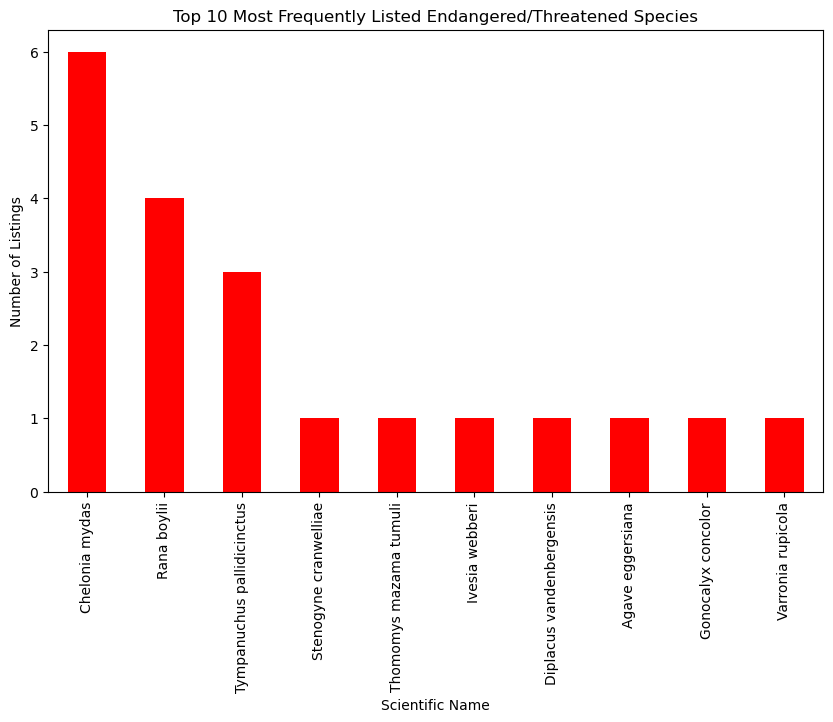

In [16]:
filtered_data = new_data[new_data['ESA Listing Status'].isin(['Endangered', 'Threatened'])]

species_counts = filtered_data['Scientific Name'].value_counts().head(10) 

fig, ax = plt.subplots(figsize=(10, 6))
species_counts.plot(kind='bar', ax=ax, color='red')

plt.xlabel("Scientific Name")
plt.ylabel("Number of Listings")
plt.title("Top 10 Most Frequently Listed Endangered/Threatened Species")


plt.show()